Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [1]:
library(tidymodels)



Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching packages ────────────────────────────────────── tidymodels 1.3.0 ──

✔ broom        1.0.9     ✔ recipes      1.3.1
✔ dials        1.4.1     ✔ rsample      1.3.1
✔ dplyr        1.1.4     ✔ tibble       3.3.0
✔ ggplot2      3.5.2     ✔ tidyr        1.3.1
✔ infer        1.0.9     ✔ tune         1.3.0
✔ modeldata    1.5.0     ✔ workflows    1.2.0
✔ parsnip      1.3.2     ✔ workflowsets 1.1.1
✔ purrr        1.1.0     ✔ yardstick    1.3.2

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [2]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [3]:

glimpse(diabetes_train)


Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 5, 4, 10, 3, 8, 1, 13, 5, 5, 6, 10, 4, 11,…
$ Glucose                  <dbl> 89, 116, 110, 139, 126, 99, 97, 145, 117, 109…
$ BloodPressure            <dbl> 66, 74, 92, 80, 88, 84, 66, 82, 92, 75, 92, 7…
$ SkinThickness            <dbl> 23, 0, 0, 0, 41, 0, 15, 19, 0, 26, 0, 31, 33,…
$ Insulin                  <dbl> 94, 0, 0, 0, 235, 0, 140, 110, 0, 0, 0, 0, 19…
$ BMI                      <dbl> 28.1, 25.6, 37.6, 27.1, 39.3, 35.4, 23.2, 22.…
$ DiabetesPedigreeFunction <dbl> 0.167, 0.201, 0.191, 1.441, 0.704, 0.388, 0.4…
$ Age                      <dbl> 21, 30, 30, 57, 27, 50, 22, 57, 38, 60, 28, 4…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

The Outcome variable is suitable as the outcome (dependent variable) in a logistic regression model, because it is a binary categorical variable (0 = no diabetes, 1 = diabetes).

All the others are continuous/numeric predictors, which are suitable as independent variables.

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     | Plasma glucose concentration a 2 hours in an oral glucose tolerance test|
| BMI         | Body mass index (weight in kg/(height in m)^2)|

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

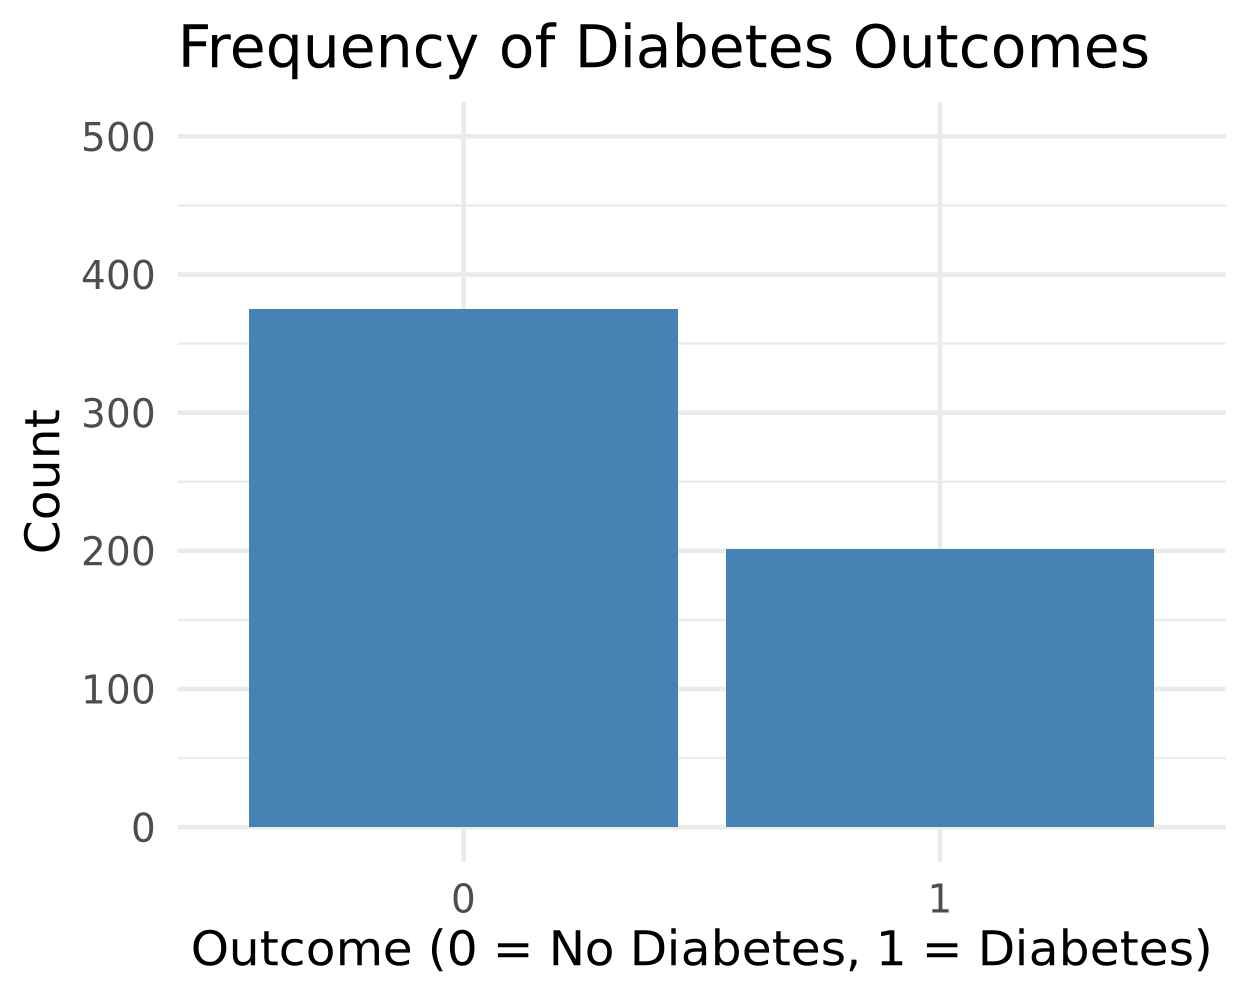

In [5]:
library(ggplot2)

ggplot(diabetes_train, aes(x = Outcome)) +
  geom_bar(fill = "steelblue") +
  labs(title = "Frequency of Diabetes Outcomes",
       x = "Outcome (0 = No Diabetes, 1 = Diabetes)",
       y = "Count") +
  scale_y_continuous(limits = c(0, 500)) +
  theme_minimal(base_size = 14)

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

The data is not balanced. There are substantially more “No Diabetes” cases (Outcome = 0) than “Diabetes” cases (Outcome = 1). There is more than a 100+ difference in counts between the "No Diabetes" and "Diabetes" cases.



Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [6]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,89.0
0,BMI,28.1
0,Glucose,116.0
0,BMI,25.6
0,Glucose,110.0
0,BMI,37.6


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

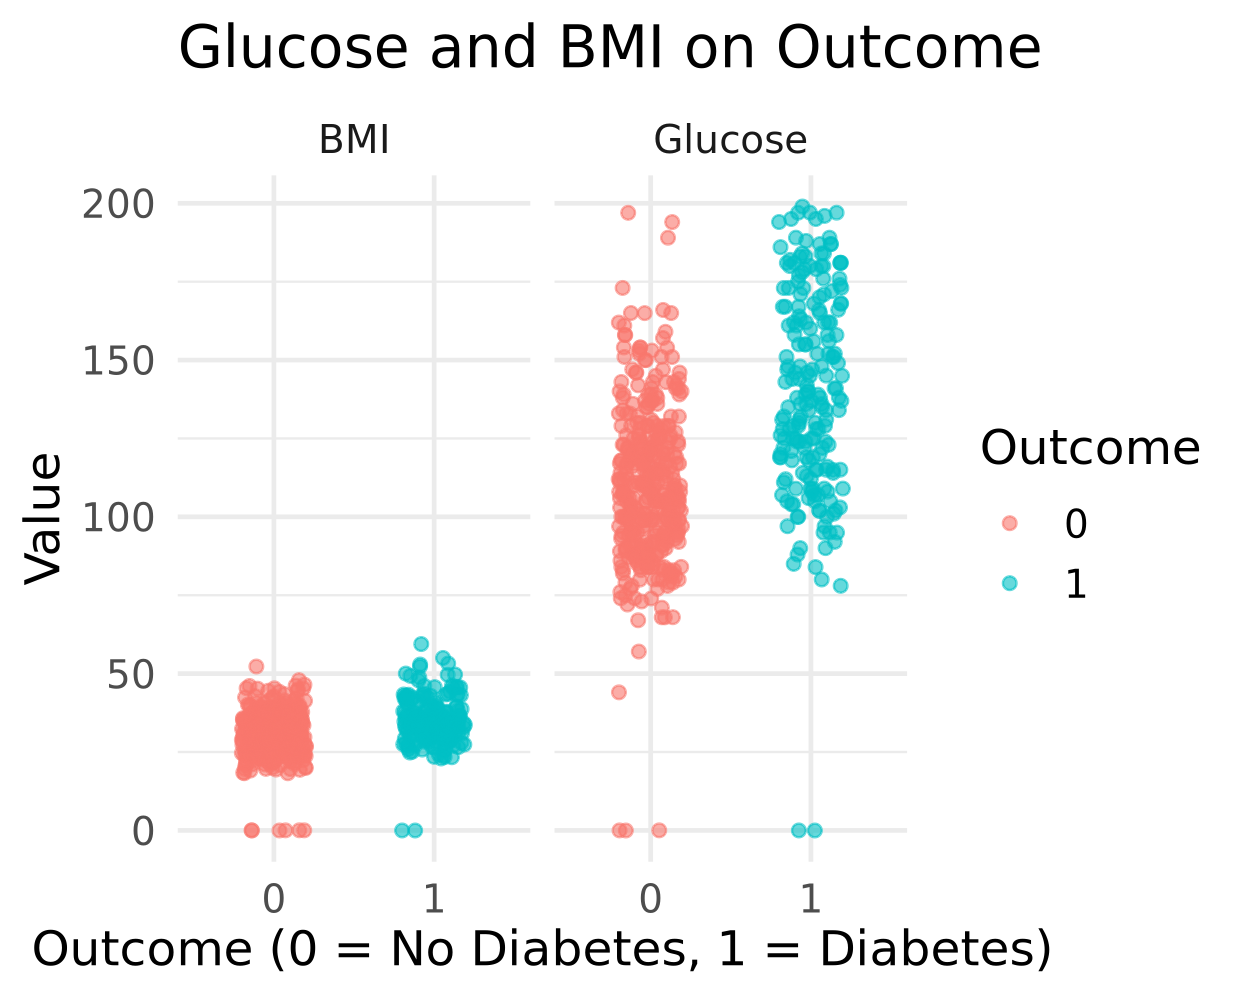

In [18]:
ggplot(plot_df, aes(x = Outcome, y = value, color = Outcome)) +
  geom_jitter(width = 0.2, alpha = 0.6) +
  facet_wrap(~name, ncol = 2, scales = "free_x") +
  labs(title = "Glucose and BMI on Outcome",
       x = "Outcome (0 = No Diabetes, 1 = Diabetes)",
       y = "Value") +
  theme_minimal(base_size = 14)



❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

When scales = "free_x" is removed, both facets share the same x-axis scale, so the 0 and 1 outcomes line up identically across panels. When scales = "free_x" is included, each facet has its own independent x-axis. Since both still use 0/1, the labels look the same, but the spacing can differ slightly across facets.

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [36]:

log_mod <- logistic_reg() %>%
  set_engine("glm") %>%       # <- glm as the engine
  set_mode("classification")

mod_fit <- log_mod %>%
  fit(Outcome ~ BMI + Glucose, data = diabetes_train)

mod_fit

parsnip model object


Call:  stats::glm(formula = Outcome ~ BMI + Glucose, family = stats::binomial, 
    data = data)

Coefficients:
(Intercept)          BMI      Glucose  
   -7.37812      0.07207      0.03547  

Degrees of Freedom: 575 Total (i.e. Null);  573 Residual
Null Deviance:	    745.1 
Residual Deviance: 586.9 	AIC: 592.9

Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [39]:

diabetes_test_wPred <- augment(mod_fit, new_data = diabetes_test)

head(diabetes_test_wPred)

.pred_class,.pred_0,.pred_1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,0.92030101,0.07969899,1,85,66,29,0,26.6,0.351,31,0
0,0.68036633,0.31963367,10,115,0,0,0,35.3,0.134,29,0
0,0.84149821,0.15850179,7,100,0,0,0,30.0,0.484,32,1
0,0.64667781,0.35332219,1,103,30,38,83,43.3,0.183,33,0
1,0.08005719,0.91994281,7,196,90,0,0,39.8,0.451,41,1
1,0.41793149,0.58206851,11,143,94,33,146,36.6,0.254,51,1


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [40]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 108  29
         1  17  38

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:** Based on the confusion matrix, there were 67 actual diabetes cases in the test data (29 + 38). When the true outcome was 1 (diabetes), the model predicted 1 for 38 individuals (true positives) but incorrectly predicted 0 for 29 individuals (false negatives). When the true outcome was 0 (no diabetes), the model correctly predicted 0 for 108 individuals (true negatives) but incorrectly predicted 1 for 17 individuals (false positives).